# The lines before the header were manually removed

New Code with pickle

In [12]:
import pandas as pd
import pickle

# Load the data
try:
    with open("data/county_clare.pkl", "rb") as f:
        county_clare = pickle.load(f)
except FileNotFoundError:
    county_clare = pd.read_csv("data/dly518_clare-shannonairport.csv")
    county_clare["date"] = pd.to_datetime(county_clare["date"])
    county_clare = county_clare[(county_clare["date"].dt.year >= 2018) & (county_clare["date"].dt.year <= 2022)]


In [13]:
county_clare = county_clare.loc[:, ~county_clare.columns.str.startswith(('ind', 'file'))]

In [14]:
# Assuming df is the name of your dataframe
county_clare= county_clare.replace(r'\s+', 777444, regex=True)


In [15]:
for column in county_clare.columns:
    # get the indices of the rows that contain 777444
    indices = county_clare[county_clare[column] == 777444].index.tolist()
    
    # get the date column values for those indices
    dates = county_clare.loc[indices, 'date'].tolist()
    
    # print the results
    print(f'The value of 777444 occurred {len(indices)} times in {column} on the following dates: {dates}.')

The value of 777444 occurred 0 times in date on the following dates: [].
The value of 777444 occurred 0 times in maxtp on the following dates: [].
The value of 777444 occurred 0 times in mintp on the following dates: [].
The value of 777444 occurred 0 times in igmin on the following dates: [].
The value of 777444 occurred 0 times in gmin on the following dates: [].
The value of 777444 occurred 0 times in rain on the following dates: [].
The value of 777444 occurred 0 times in cbl on the following dates: [].
The value of 777444 occurred 0 times in wdsp on the following dates: [].
The value of 777444 occurred 0 times in hm on the following dates: [].
The value of 777444 occurred 0 times in ddhm on the following dates: [].
The value of 777444 occurred 0 times in hg on the following dates: [].
The value of 777444 occurred 0 times in sun on the following dates: [].
The value of 777444 occurred 0 times in dos on the following dates: [].
The value of 777444 occurred 0 times in soil on the fol

In [16]:
county_clare[["sun","hm","ddhm"]] = county_clare[["sun","hm","ddhm"]].astype("int64")

In [17]:
# Convert multiple columns to float data type
columns_to_convert = ["gmin", "rain", "cbl", "wdsp", "soil", "pe", "evap", "smd_wd", "smd_md", "smd_pd"]
county_clare[columns_to_convert] = county_clare[columns_to_convert].astype(float)


In [18]:
print(county_clare.dtypes)

date              datetime64[ns]
maxtp                    float64
mintp                    float64
igmin                     object
gmin                     float64
rain                     float64
cbl                      float64
wdsp                     float64
hm                         int64
ddhm                       int64
hg                         int64
sun                        int64
dos                       object
soil                     float64
pe                       float64
evap                     float64
smd_wd                   float64
smd_md                   float64
smd_pd                   float64
rainfall_class              bool
dtype: object


In [19]:
county_clare['rainfall_class'] = county_clare['rain'] != 0

In [25]:
county_clare = county_clare.drop("soil", axis=1)


In [26]:
with open("data/county_clare.pkl", "wb") as f:
        pickle.dump(county_clare, f)

Starting point from loading Pkl file

In [1]:
import pandas as pd
import pickle

with open("data/county_clare.pkl", "rb") as f:
    county_clare = pickle.load(f)


In [36]:
county_clare.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
maxtp,1826.0,14.308434,4.995129,-1.2,10.6,14.00,17.800,32.0
mintp,1826.0,7.424261,4.485708,-5.0,4.1,7.50,11.000,18.9
gmin,1826.0,5.940581,5.142971,-8.1,2.1,6.00,10.075,17.4
rain,1826.0,2.851369,4.475076,0.0,0.0,0.70,4.000,34.2
cbl,1826.0,1011.148521,12.149276,972.3,1003.3,1012.20,1019.775,1043.8
wdsp,1826.0,8.851917,4.060573,1.0,5.8,8.25,11.300,29.1
hm,1826.0,17.190581,6.595045,3.0,12.0,16.00,21.000,47.0
ddhm,1826.0,206.352683,85.779931,0.0,140.0,230.00,270.000,360.0
hg,1826.0,24.296824,9.697482,5.0,17.0,23.00,29.000,66.0
sun,1826.0,3.558050,3.697933,0.0,0.0,2.00,6.000,15.0


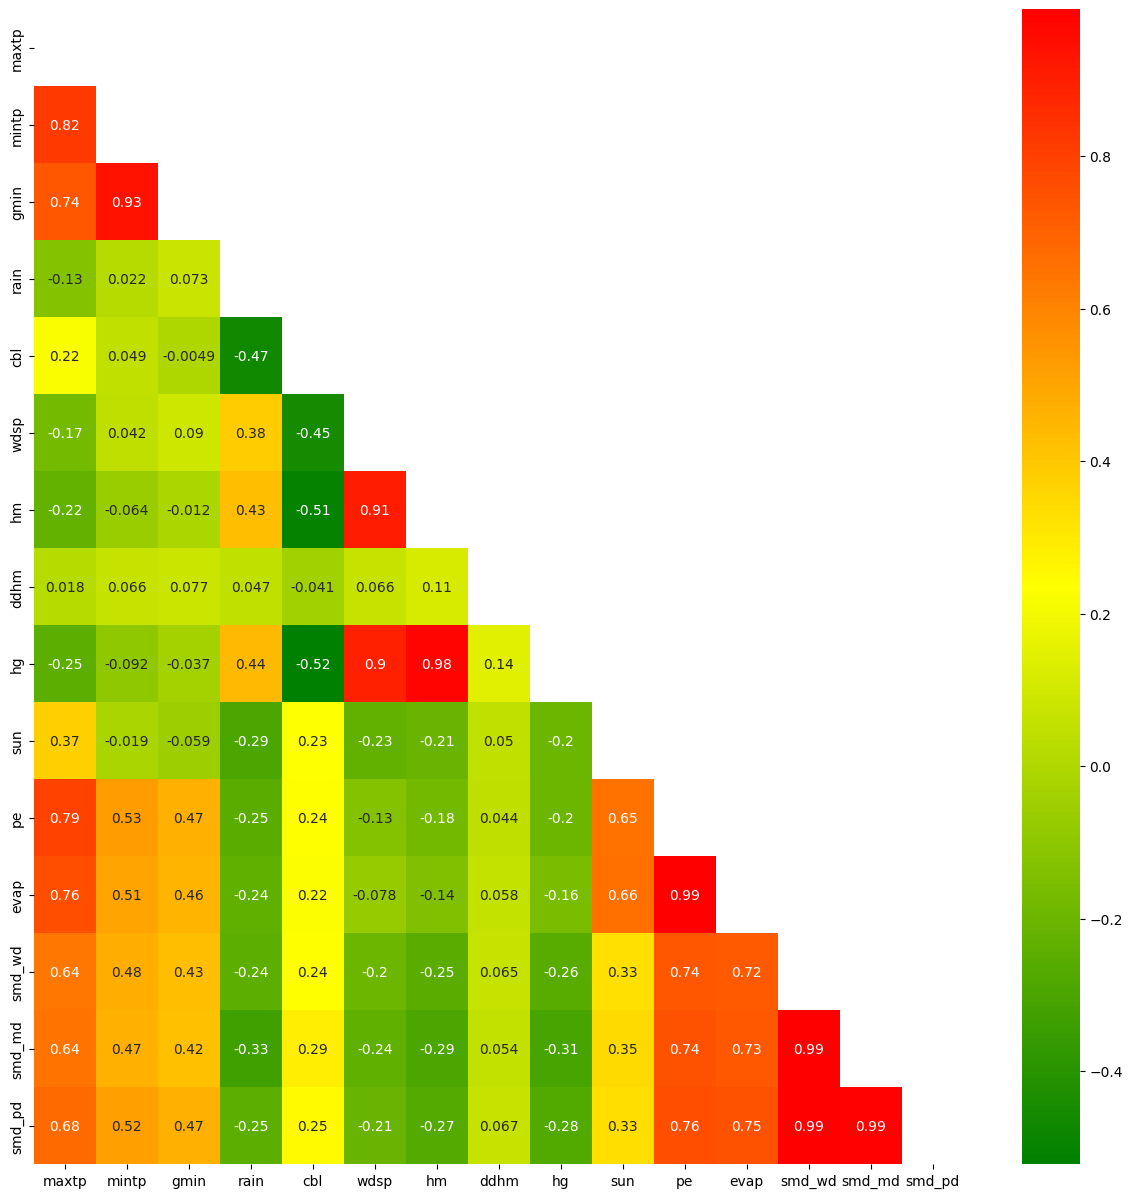

In [29]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define the colors for the colormap
colors = ['green', 'yellow', 'red']

# Create the colormap
cmap = LinearSegmentedColormap.from_list('green_yellow_red', colors)

# Plot correlation matrix for numerical variables in shanon dataset except date,ind.5,ind.4,ind.3,ind.2,ind.1
num_cols = county_clare.select_dtypes(include="number").filter(regex='^(?!ind)').columns  
corr = county_clare[num_cols].corr(method="pearson")
plt.figure(figsize=(15, 15))
# Create a lower triangular heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True,cmap=cmap)
plt.savefig("clare_heatmap_pearson.png")

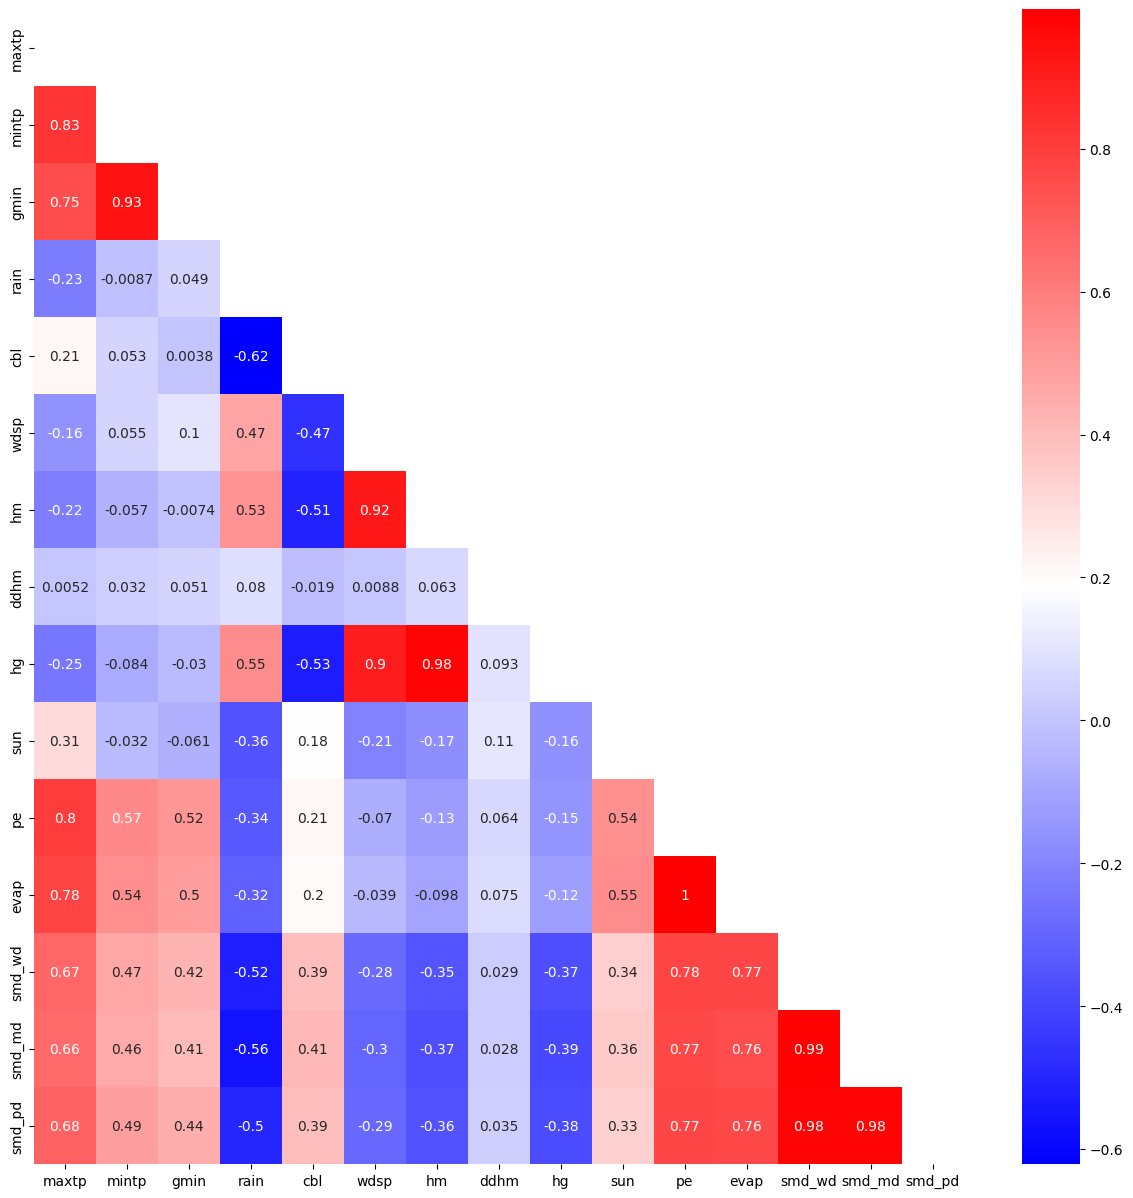

In [30]:
num_cols = county_clare.select_dtypes(include="number").filter(regex='^(?!ind)').columns     
corr = county_clare[num_cols].corr(method="spearman")
plt.figure(figsize=(15, 15))
# Create a lower triangular heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True,cmap="bwr")
plt.savefig("clare_heatmap_spearman.png")

All Features

In [2]:
from sklearn.preprocessing import PowerTransformer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, confusion_matrix, balanced_accuracy_score

# Import matplotlib for plotting
import matplotlib.pyplot as plt
# Split data into features and target
X = county_clare.drop(['rainfall_class','date'], axis=1)
y = county_clare['rainfall_class']
scaler = PowerTransformer(method='yeo-johnson')
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def test_model(name, model):
    # Fit model on train set
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)

    auc_pr = average_precision_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred > 0.5) # You can choose a different threshold
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred > 0.5)

    # Return a list of values for each metric
    values = [auc_pr, auc_roc, sensitivity, specificity, balanced_accuracy]
    return values

# Create a list of model names and instances
models = [
    ("Logistic regression", LogisticRegression()),
    ("Random forest", RandomForestClassifier()),
    ("KNN Classifier", KNeighborsClassifier(n_neighbors=5)),
    ("Adaptive boosting", AdaBoostClassifier()),
    ("Extreme gradient boosting", XGBClassifier())
]

# Create a table with pandas
import pandas as pd
metrics = ["AUC-PR", "AUC-ROC", "Sensitivity", "Specificity", "Balanced Accuracy"]
table = pd.DataFrame(columns=["Model"] + metrics) # Add a column for the model name

# Loop over the models and test each one
for name, model in models:
   values = test_model(name, model) # Get the values from the function
   table.loc[len(table)] = [name] + values # Add a row to the table with the name and values

table[metrics] = table[metrics].round(3) # Format the values to 3 decimal places

# Display the table
display(table)

,Model,AUC-PR,AUC-ROC,Sensitivity,Specificity,Balanced Accuracy
0,Logistic regression,0.994,0.989,0.977,1.00,0.989
1,Random forest,1.000,1.000,1.000,1.00,1.000
2,KNN Classifier,0.929,0.893,0.936,0.85,0.893
3,Adaptive boosting,1.000,1.000,1.000,1.00,1.000
4,Extreme gradient boosting,1.000,1.000,1.000,1.00,1.000


Removing hm

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, balanced_accuracy_score

# Define the models
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Random Forest", RandomForestClassifier()),
    ("KNN", KNeighborsClassifier(n_neighbors=5)),
    ("Adaptive Boosting", AdaBoostClassifier()),
    ("Extreme Gradient Boosting", XGBClassifier())
]

# Define the performance metrics
metrics = ["AUC-PR", "AUC-ROC", "Balanced Accuracy", "Sensitivity", "Specificity"]

# Initialize an empty dataframe to store the results
results = pd.DataFrame(columns=["Model"] + metrics)

# Split data into features and target
X = county_clare.drop(['rainfall_class', 'date', 'hm'], axis=1)
y = county_clare['rainfall_class']

# Scale the features
scaler = PowerTransformer(method='yeo-johnson')
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Loop over the models and evaluate each one
for name, model in models:
    # Fit the model on the training set
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate the performance metrics
    auc_pr = average_precision_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred > 0.5) # You can choose a different threshold
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    # Add the results to the dataframe

table = pd.DataFrame(columns=["Model"] + metrics) # Add a column for the model name

# Loop over the models and test each one
for name, model in models:
   values = test_model(name, model) # Get the values from the function
   table.loc[len(table)] = [name] + values # Add a row to the table with the name and values

table[metrics] = table[metrics].round(3) # Format the values to 3 decimal places

# Display the table
display(table)

,Model,AUC-PR,AUC-ROC,Balanced Accuracy,Sensitivity,Specificity
0,Logistic Regression,0.994,0.989,0.977,1.00,0.989
1,Random Forest,1.000,1.000,1.000,1.00,1.000
2,KNN,0.930,0.892,0.925,0.86,0.892
3,Adaptive Boosting,1.000,1.000,1.000,1.00,1.000
4,Extreme Gradient Boosting,1.000,1.000,1.000,1.00,1.000


Removing Minimum Temperature

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, balanced_accuracy_score

# Define the models
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Random Forest", RandomForestClassifier()),
    ("KNN", KNeighborsClassifier(n_neighbors=5)),
    ("Adaptive Boosting", AdaBoostClassifier()),
    ("Extreme Gradient Boosting", XGBClassifier())
]

# Define the performance metrics
metrics = ["AUC-PR", "AUC-ROC", "Balanced Accuracy", "Sensitivity", "Specificity"]

# Initialize an empty dataframe to store the results
results = pd.DataFrame(columns=["Model"] + metrics)

# Split data into features and target
X = county_clare.drop(['rainfall_class','date', 'mintp'], axis=1)
y = county_clare['rainfall_class']

# Scale the features
scaler = PowerTransformer(method='yeo-johnson')
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Loop over the models and evaluate each one
for name, model in models:
    # Fit the model on the training set
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate the performance metrics
    auc_pr = average_precision_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred > 0.5) # You can choose a different threshold
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    # Add the results to the dataframe

table = pd.DataFrame(columns=["Model"] + metrics) # Add a column for the model name

# Loop over the models and test each one
for name, model in models:
   values = test_model(name, model) # Get the values from the function
   table.loc[len(table)] = [name] + values # Add a row to the table with the name and values

table[metrics] = table[metrics].round(3) # Format the values to 3 decimal places

# Display the table
display(table)



,Model,AUC-PR,AUC-ROC,Balanced Accuracy,Sensitivity,Specificity
0,Logistic Regression,0.994,0.989,0.977,1.00,0.989
1,Random Forest,1.000,1.000,1.000,1.00,1.000
2,KNN,0.925,0.886,0.921,0.85,0.886
3,Adaptive Boosting,1.000,1.000,1.000,1.00,1.000
4,Extreme Gradient Boosting,1.000,1.000,1.000,1.00,1.000


Dropping pe

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, balanced_accuracy_score

# Define the models
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Random Forest", RandomForestClassifier()),
    ("KNN", KNeighborsClassifier(n_neighbors=5)),
    ("Adaptive Boosting", AdaBoostClassifier()),
    ("Extreme Gradient Boosting", XGBClassifier())
]

# Define the performance metrics
metrics = ["AUC-PR", "AUC-ROC", "Balanced Accuracy", "Sensitivity", "Specificity"]

# Initialize an empty dataframe to store the results
results = pd.DataFrame(columns=["Model"] + metrics)

# Split data into features and target
X = county_clare.drop(['date','rainfall_class', 'pe'], axis=1)
y = county_clare['rainfall_class']

# Scale the features
scaler = PowerTransformer(method='yeo-johnson')
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Loop over the models and evaluate each one
for name, model in models:
    # Fit the model on the training set
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate the performance metrics
    auc_pr = average_precision_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred > 0.5) # You can choose a different threshold
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    # Add the results to the dataframe

table = pd.DataFrame(columns=["Model"] + metrics) # Add a column for the model name

# Loop over the models and test each one
for name, model in models:
   values = test_model(name, model) # Get the values from the function
   table.loc[len(table)] = [name] + values # Add a row to the table with the name and values

table[metrics] = table[metrics].round(3) # Format the values to 3 decimal places

# Display the table
display(table)

,Model,AUC-PR,AUC-ROC,Balanced Accuracy,Sensitivity,Specificity
0,Logistic Regression,0.994,0.989,0.977,1.00,0.989
1,Random Forest,1.000,1.000,1.000,1.00,1.000
2,KNN,0.921,0.878,0.906,0.85,0.878
3,Adaptive Boosting,1.000,1.000,1.000,1.00,1.000
4,Extreme Gradient Boosting,1.000,1.000,1.000,1.00,1.000


Dropping hg

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, balanced_accuracy_score

# Define the models
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Random Forest", RandomForestClassifier()),
    ("KNN", KNeighborsClassifier(n_neighbors=5)),
    ("Adaptive Boosting", AdaBoostClassifier()),
    ("Extreme Gradient Boosting", XGBClassifier())
]

# Define the performance metrics
metrics = ["AUC-PR", "AUC-ROC", "Balanced Accuracy", "Sensitivity", "Specificity"]

# Initialize an empty dataframe to store the results
results = pd.DataFrame(columns=["Model"] + metrics)

# Split data into features and target
X = county_clare.drop(['date','rainfall_class', 'hg'], axis=1)
y = county_clare['rainfall_class']

# Scale the features
scaler = PowerTransformer(method='yeo-johnson')
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Loop over the models and evaluate each one
for name, model in models:
    # Fit the model on the training set
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate the performance metrics
    auc_pr = average_precision_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred > 0.5) # You can choose a different threshold
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    # Add the results to the dataframe

table = pd.DataFrame(columns=["Model"] + metrics) # Add a column for the model name

# Loop over the models and test each one
for name, model in models:
   values = test_model(name, model) # Get the values from the function
   table.loc[len(table)] = [name] + values # Add a row to the table with the name and values

table[metrics] = table[metrics].round(3) # Format the values to 3 decimal places

# Display the table
display(table)

,Model,AUC-PR,AUC-ROC,Balanced Accuracy,Sensitivity,Specificity
0,Logistic Regression,0.995,0.991,0.981,1.00,0.991
1,Random Forest,1.000,1.000,1.000,1.00,1.000
2,KNN,0.925,0.886,0.921,0.85,0.886
3,Adaptive Boosting,1.000,1.000,1.000,1.00,1.000
4,Extreme Gradient Boosting,1.000,1.000,1.000,1.00,1.000


Dropping Smd_wd

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, balanced_accuracy_score

# Define the models
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Random Forest", RandomForestClassifier()),
    ("KNN", KNeighborsClassifier(n_neighbors=5)),
    ("Adaptive Boosting", AdaBoostClassifier()),
    ("Extreme Gradient Boosting", XGBClassifier())
]

# Define the performance metrics
metrics = ["AUC-PR", "AUC-ROC", "Balanced Accuracy", "Sensitivity", "Specificity"]

# Initialize an empty dataframe to store the results
results = pd.DataFrame(columns=["Model"] + metrics)

# Split data into features and target
X = county_clare.drop(['date','rainfall_class', 'smd_wd'], axis=1)
y = county_clare['rainfall_class']

# Scale the features
scaler = PowerTransformer(method='yeo-johnson')
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Loop over the models and evaluate each one
for name, model in models:
    # Fit the model on the training set
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate the performance metrics
    auc_pr = average_precision_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred > 0.5) # You can choose a different threshold
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    # Add the results to the dataframe

table = pd.DataFrame(columns=["Model"] + metrics) # Add a column for the model name

# Loop over the models and test each one
for name, model in models:
   values = test_model(name, model) # Get the values from the function
   table.loc[len(table)] = [name] + values # Add a row to the table with the name and values

table[metrics] = table[metrics].round(3) # Format the values to 3 decimal places

# Display the table
display(table)

,Model,AUC-PR,AUC-ROC,Balanced Accuracy,Sensitivity,Specificity
0,Logistic Regression,0.995,0.991,0.981,1.00,0.991
1,Random Forest,1.000,1.000,1.000,1.00,1.000
2,KNN,0.931,0.897,0.944,0.85,0.897
3,Adaptive Boosting,1.000,1.000,1.000,1.00,1.000
4,Extreme Gradient Boosting,1.000,1.000,1.000,1.00,1.000


Dropping Smd_md 

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, balanced_accuracy_score

# Define the models
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Random Forest", RandomForestClassifier()),
    ("KNN", KNeighborsClassifier(n_neighbors=5)),
    ("Adaptive Boosting", AdaBoostClassifier()),
    ("Extreme Gradient Boosting", XGBClassifier())
]

# Define the performance metrics
metrics = ["AUC-PR", "AUC-ROC", "Balanced Accuracy", "Sensitivity", "Specificity"]

# Initialize an empty dataframe to store the results
results = pd.DataFrame(columns=["Model"] + metrics)

# Split data into features and target
X = county_clare.drop(['date','rainfall_class', 'smd_md'], axis=1)
y = county_clare['rainfall_class']

# Scale the features
scaler = PowerTransformer(method='yeo-johnson')
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Loop over the models and evaluate each one
for name, model in models:
    # Fit the model on the training set
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate the performance metrics
    auc_pr = average_precision_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred > 0.5) # You can choose a different threshold
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    # Add the results to the dataframe

table = pd.DataFrame(columns=["Model"] + metrics) # Add a column for the model name

# Loop over the models and test each one
for name, model in models:
   values = test_model(name, model) # Get the values from the function
   table.loc[len(table)] = [name] + values # Add a row to the table with the name and values

table[metrics] = table[metrics].round(3) # Format the values to 3 decimal places

# Display the table
display(table)

,Model,AUC-PR,AUC-ROC,Balanced Accuracy,Sensitivity,Specificity
0,Logistic Regression,0.994,0.989,0.977,1.00,0.989
1,Random Forest,1.000,1.000,1.000,1.00,1.000
2,KNN,0.931,0.894,0.929,0.86,0.894
3,Adaptive Boosting,1.000,1.000,1.000,1.00,1.000
4,Extreme Gradient Boosting,1.000,1.000,1.000,1.00,1.000


Dropping all previously mentioned columns

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, balanced_accuracy_score

# Define the models
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Random Forest", RandomForestClassifier()),
    ("KNN", KNeighborsClassifier(n_neighbors=5)),
    ("Adaptive Boosting", AdaBoostClassifier()),
    ("Extreme Gradient Boosting", XGBClassifier())
]

# Define the performance metrics
metrics = ["AUC-PR", "AUC-ROC", "Balanced Accuracy", "Sensitivity", "Specificity"]

# Initialize an empty dataframe to store the results
results = pd.DataFrame(columns=["Model"] + metrics)

# Split data into features and target
X = county_clare.drop(['date','rainfall_class','hg','hm','pe','mintp','smd_wd','smd_md'], axis=1)
y = county_clare['rainfall_class']

# Scale the features
scaler = PowerTransformer(method='yeo-johnson')
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Loop over the models and evaluate each one
for name, model in models:
    # Fit the model on the training set
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate the performance metrics
    auc_pr = average_precision_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred > 0.5) # You can choose a different threshold
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    # Add the results to the dataframe

table = pd.DataFrame(columns=["Model"] + metrics) # Add a column for the model name

# Loop over the models and test each one
for name, model in models:
   values = test_model(name, model) # Get the values from the function
   table.loc[len(table)] = [name] + values # Add a row to the table with the name and values

table[metrics] = table[metrics].round(3) # Format the values to 3 decimal places

# Display the table
display(table)

,Model,AUC-PR,AUC-ROC,Balanced Accuracy,Sensitivity,Specificity
0,Logistic Regression,0.994,0.989,0.977,1.00,0.989
1,Random Forest,1.000,1.000,1.000,1.00,1.000
2,KNN,0.930,0.892,0.925,0.86,0.892
3,Adaptive Boosting,1.000,1.000,1.000,1.00,1.000
4,Extreme Gradient Boosting,1.000,1.000,1.000,1.00,1.000


In [ ]:
#pip install lofo-importance

In [11]:
import pandas as pd
from sklearn.model_selection import KFold, StratifiedKFold
from lofo import LOFOImportance, Dataset, plot_importance
%matplotlib inline

C:\Users\meatefza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\lofo\lofo_importance.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [12]:
# extract a sample of the data
sample_clare =county_clare.drop(['date','rain'], axis=1)
#sample_df.sort_values("columnid", inplace=True) # Sort by time for time split validation

In [13]:
# define the validation scheme
cv4_clare = KFold(n_splits=4, shuffle=False, random_state=None) # Don't shuffle to keep the time split split validation

In [15]:
# define the binary target and the features
datasetclare = Dataset(df=sample_clare, target="rainfall_class", features=[col for col in sample_clare.columns if col != "rainfall_class"])

In [16]:
from sklearn.linear_model import LogisticRegression
# change the default model to logistic regression
log_reg = LogisticRegression()
lofo_implogclare = LOFOImportance(datasetclare, cv=cv4_clare, scoring="roc_auc", model=log_reg)
importance_dflogclare = lofo_implogclare.get_importance()

  0%|          | 0/16 [00:00<?, ?it/s]

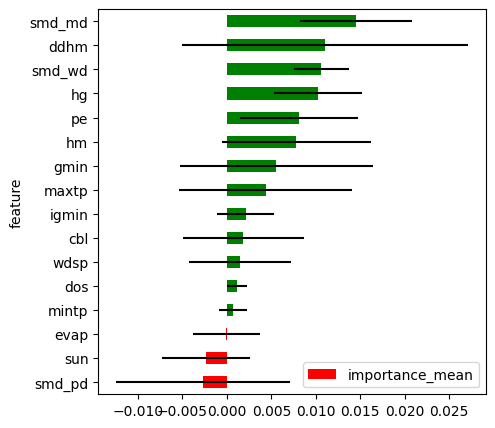

In [17]:
# plot the means and standard deviations of the importances
plot_importance(importance_dflogclare, figsize=(5, 5))

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf_cls =  RandomForestClassifier()
lofo_imprandomforestclare = LOFOImportance(datasetclare, cv=cv4_clare, scoring="roc_auc", model=rf_cls)

In [19]:
importance_dfforestclare = lofo_imprandomforestclare.get_importance()

  0%|          | 0/16 [00:00<?, ?it/s]

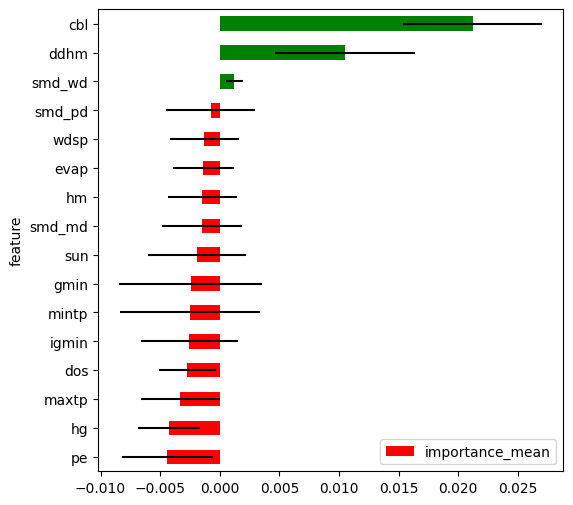

In [20]:
plot_importance(importance_dfforestclare, figsize=(6, 6))

In [21]:
from sklearn.neighbors import KNeighborsClassifier
rf_knn =  KNeighborsClassifier(n_neighbors=5)
lofo_impknnclare = LOFOImportance(datasetclare, cv=cv4_clare, scoring="roc_auc", model=rf_knn)
importance_knnclare = lofo_impknnclare.get_importance()

  0%|          | 0/16 [00:00<?, ?it/s]

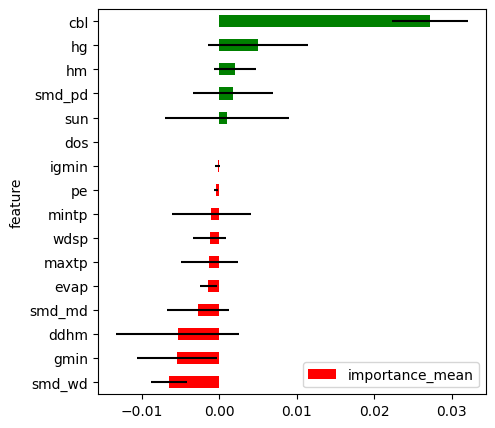

In [22]:
plot_importance(importance_knnclare, figsize=(5, 5))

In [23]:
from sklearn.ensemble import AdaBoostClassifier
rf_adaboooster =  AdaBoostClassifier()
lofo_impadaboosterclare = LOFOImportance(datasetclare, cv=cv4_clare, scoring="roc_auc", model=rf_adaboooster)

In [24]:
importance_adaclare = lofo_impadaboosterclare.get_importance()

  0%|          | 0/16 [00:00<?, ?it/s]

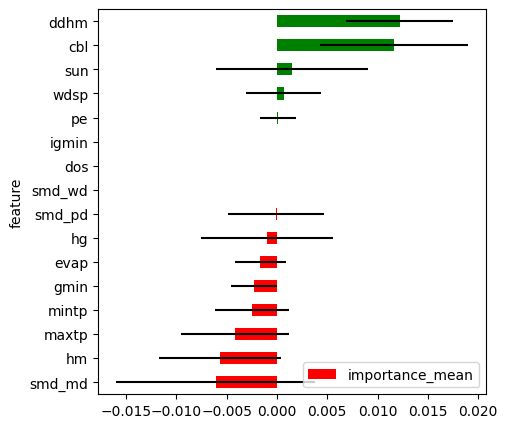

In [25]:
plot_importance(importance_adaclare, figsize=(5, 5))

In [26]:
from xgboost import XGBClassifier
rf_xgbbooster =  XGBClassifier()
lofo_impxgbboosterclare = LOFOImportance(datasetclare, cv=cv4_clare, scoring="roc_auc", model=rf_xgbbooster)

In [27]:
importance_xgbclare = lofo_impxgbboosterclare.get_importance()

  0%|          | 0/16 [00:00<?, ?it/s]

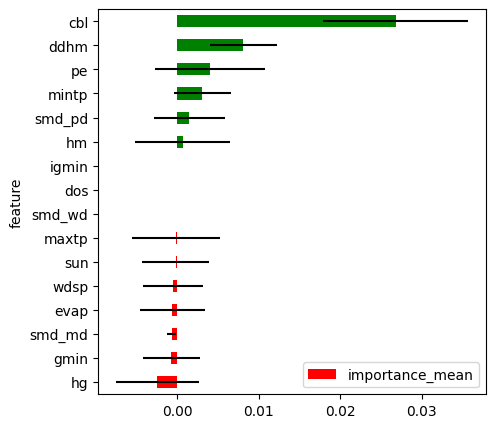

In [28]:
plot_importance(importance_xgbclare, figsize=(5, 5))

In [29]:
import shap
shap.initjs() 

Logistic Regession

Permutation explainer: 367it [00:17, 13.03it/s]                         


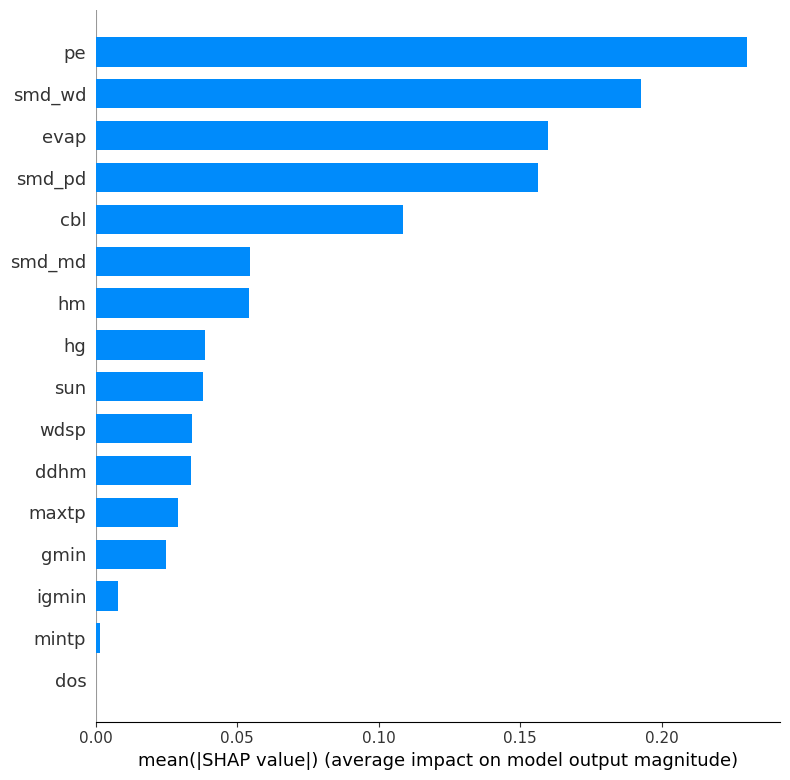

In [30]:
import pandas as pd
import numpy as np
import shap
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Import matplotlib for plotting
import matplotlib.pyplot as plt
# Split data into features and target
X = county_clare.drop(['date','rain','rainfall_class'], axis=1)
y = county_clare['rainfall_class']
scaler = PowerTransformer(method='yeo-johnson')
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logregclare = LogisticRegression().fit(X_train, y_train)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainerlogregclare = shap.Explainer(logregclare.predict, X_train)
shap_valueslogregclare = explainerlogregclare(X_test)

shap.summary_plot(shap_valueslogregclare, X_test, plot_type="bar")

Extreme Boosting

Permutation explainer: 367it [00:36,  6.77it/s]                         


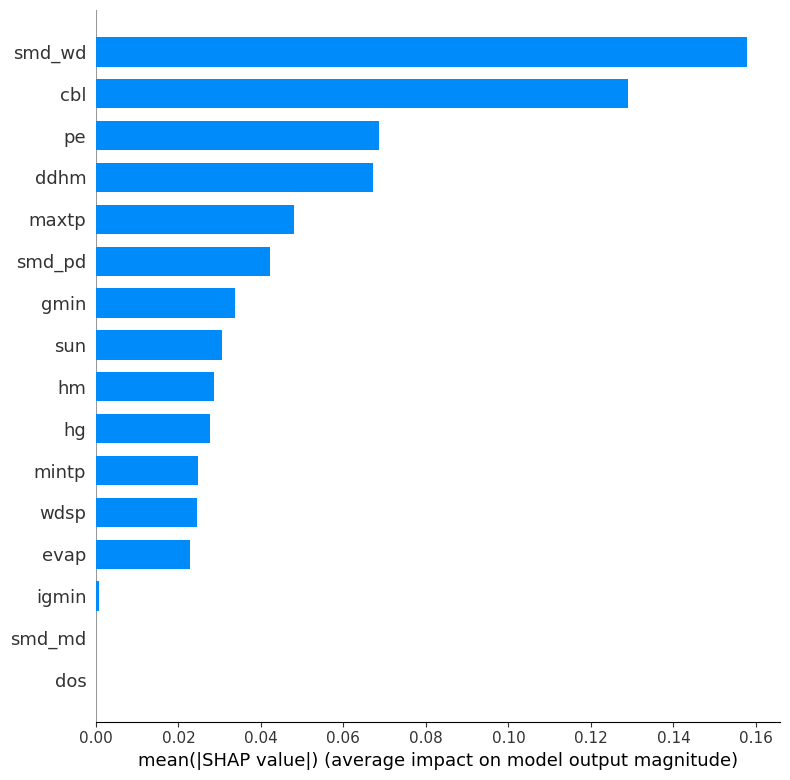

In [31]:
import pandas as pd
import numpy as np
import shap
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
# Import matplotlib for plotting
import matplotlib.pyplot as plt
# Split data into features and target
X = county_clare.drop(['date','rain','rainfall_class'], axis=1)
y = county_clare['rainfall_class']
scaler = PowerTransformer(method='yeo-johnson')
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelxgbclare = XGBClassifier().fit(X_train, y_train)
# explain the model's predictions using SHAP
explainerxgbclare = shap.Explainer(modelxgbclare.predict,X_train)
shap_xgbclare = explainerxgbclare(X_test)
# visualize the first prediction's explanation
shap.summary_plot(shap_xgbclare, X_test, plot_type="bar")

Ada Boost

Permutation explainer: 367it [03:30,  1.65it/s]                         


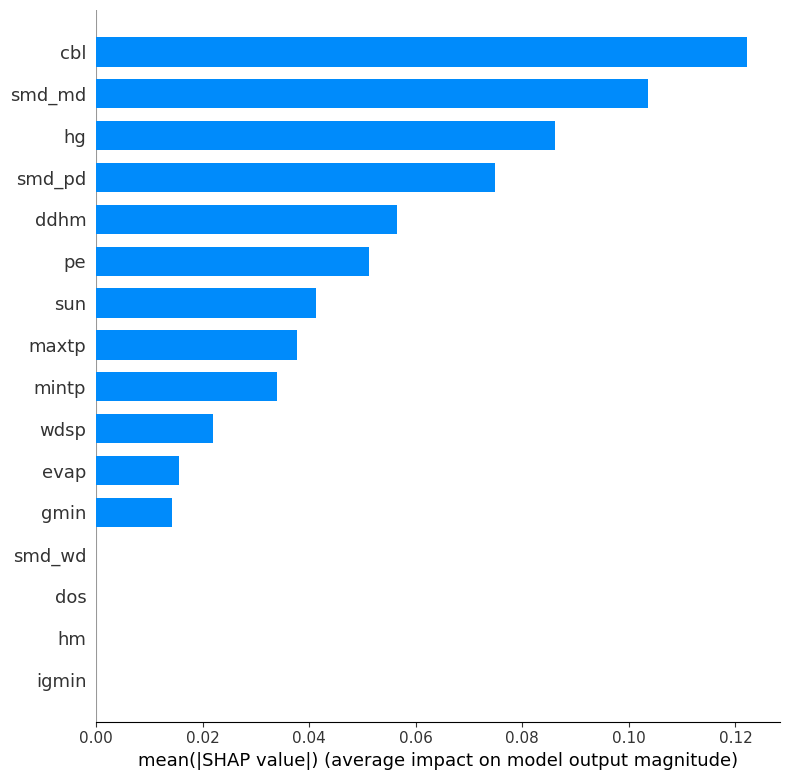

In [32]:
import pandas as pd
import numpy as np
import shap
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
# Split data into features and target
X = county_clare.drop(['date','rain','rainfall_class'], axis=1)
y = county_clare['rainfall_class']
scaler = PowerTransformer(method='yeo-johnson')
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


adboostclare = AdaBoostClassifier().fit(X_train, y_train)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer_adaboostclare = shap.Explainer(adboostclare.predict,X_train)
shap_adaboostclare = explainer_adaboostclare(X_test)

shap.summary_plot(shap_adaboostclare, X_test, plot_type="bar")

Random Forest

Permutation explainer: 367it [05:56,  1.01s/it]                         


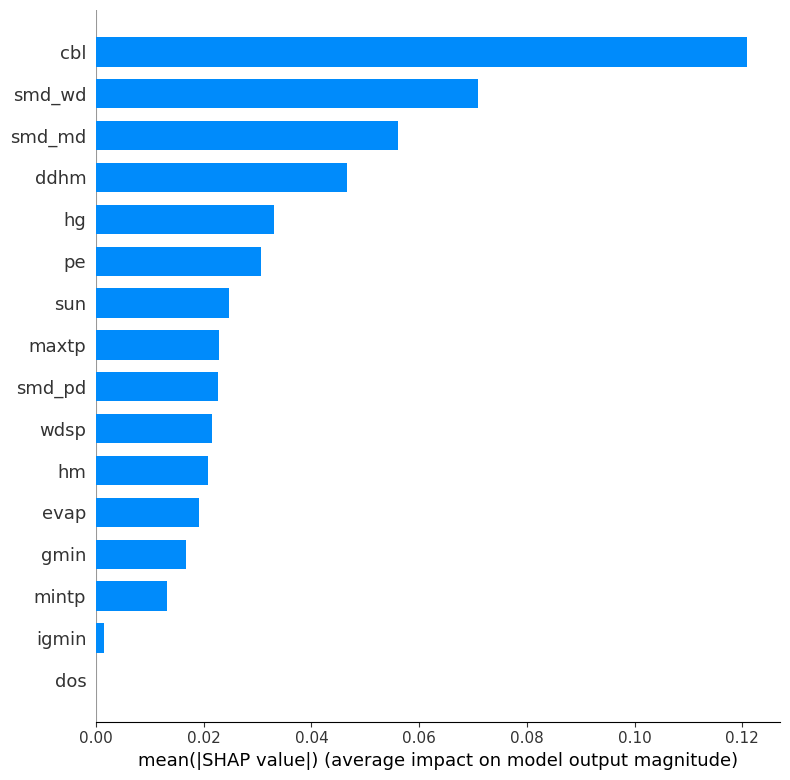

In [33]:
import pandas as pd
import numpy as np
import shap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Import matplotlib for plotting
import matplotlib.pyplot as plt
# Split data into features and target
X = county_clare.drop(['date','rain','rainfall_class'], axis=1)
y = county_clare['rainfall_class']
scaler = PowerTransformer(method='yeo-johnson')
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_clare = RandomForestClassifier().fit(X_train, y_train)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer_rf_clare = shap.Explainer(rf_clare.predict, X_train)
shap_rf_clare = explainer_rf_clare(X_test)

# visualize the first prediction's explanation
shap.summary_plot(shap_rf_clare, X_test, plot_type="bar")

KNN

Permutation explainer: 367it [31:44,  5.23s/it]                           


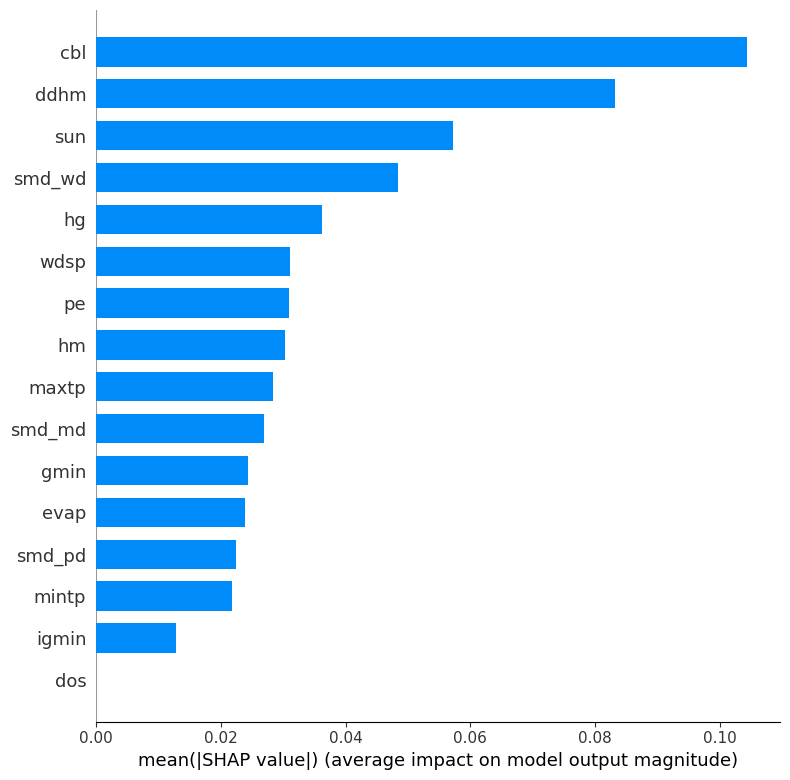

In [34]:
import pandas as pd
import numpy as np
import shap
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split


# Import matplotlib for plotting
import matplotlib.pyplot as plt
# Split data into features and target
X = county_clare.drop(['date','rain','rainfall_class'], axis=1)
y = county_clare['rainfall_class']
scaler = PowerTransformer(method='yeo-johnson')
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_clare = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer_knnclassifierclare = shap.Explainer(knn_clare.predict, X_train)
shap_values_knnclassifier = explainer_knnclassifierclare(X_test)

shap.summary_plot(shap_values_knnclassifier, X_test, plot_type="bar")